Imported Dependencies

In [163]:
from census import Census
from us import states
import pandas as pd
from config import api_key
import requests
import os
import matplotlib.pyplot as plt
from scipy.stats import linregress


Used 2019 Census Estimate URL

In [164]:
url = "https://api.census.gov/data/2019/acs/acs1?get=NAME,"
remainder_url = "&for=county:*&in=state:08&key="

In [165]:
file_path=os.path.join('..','Resources','colorado.csv')
colorado_df=pd.read_csv(file_path)
colorado_df

,id,name,brewery_type,street,address_2,address_3,city,state,county_province,postal_code,website_url,phone,created_at,updated_at,country,longitude,latitude,tags
0,denver-beer-co-olde-town-arvada-arvada,Denver Beer Co Olde Town Arvada,micro,5768 Olde Wadsworth Blvd,NaN,NaN,Arvada,Colorado,Jefferson County,80002-2549,NaN,NaN,7/24/18 1:33,8/24/18 0:22,United States,-105.081455,39.801625,NaN
1,donavon-brewing-company-arvada,Donavon Brewing Company,planning,NaN,NaN,NaN,Arvada,Colorado,Jefferson County,80005-3644,http://www.donavonbrewing.com,3.039976e+09,7/24/18 1:33,8/11/18 21:36,United States,NaN,NaN,NaN
2,grand-lake-brewing-co-the-arvada,"Grand Lake Brewing Co, The",brewpub,5610 Yukon St,NaN,NaN,Arvada,Colorado,Jefferson County,80002-2446,http://www.grandlakebrewing.com,3.039082e+09,7/24/18 1:33,8/24/18 0:23,United States,-105.082456,39.799274,NaN
3,new-image-brewing-co-arvada,New Image Brewing Co,brewpub,5622 Yukon St,NaN,NaN,Arvada,Colorado,Jefferson County,80002-2446,http://www.nibrewing.com,7.708811e+09,7/24/18 1:33,8/24/18 0:23,United States,-105.082459,39.799383,NaN
4,odyssey-beerwerks-arvada,Odyssey Beerwerks,micro,5535 W 56th Ave Ste 107,NaN,NaN,Arvada,Colorado,Jefferson County,80002-2806,http://www.odysseybeerwerks.com,3.034211e+09,7/24/18 1:33,8/11/18 21:36,United States,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,westminster-brewing-co-westminster,Westminster Brewing Co,micro,7655 W 108th Ave Ste 600,NaN,NaN,Westminster,Colorado,Jefferson County,80021-2805,http://westminsterbrewingco.com,3.032842e+09,7/24/18 1:33,8/11/18 21:36,United States,NaN,NaN,NaN
313,brewery-rickoli-wheat-ridge,Brewery Rickoli,micro,4335 Wadsworth Blvd,NaN,NaN,Wheat Ridge,Colorado,Jefferson County,80033-4621,http://www.breweryrickoli.com,3.034317e+09,7/24/18 1:33,8/24/18 0:22,United States,-105.081805,39.775729,NaN
314,colorado-plus-wheat-ridge,Colorado Plus,brewpub,6995 W 38th Ave,NaN,NaN,Wheat Ridge,Colorado,Jefferson County,80033-4965,http://coloradoplus.net,3.038776e+09,7/24/18 1:33,8/24/18 0:22,United States,-105.091638,39.769352,NaN
315,high-hops-brewery-windsor,High Hops Brewery,micro,6461 State Highway 392,NaN,NaN,Windsor,Colorado,Weld County,80550-3010,http://www.highhopsbrewery.com,9.706743e+09,7/24/18 1:33,8/24/18 0:23,United States,-104.935756,40.479990,NaN


In [166]:
county_group=colorado_df.groupby('county_province')['county_province'].count()
county_group
#=county_group.reset_index()
#new_df.rename(columns=({'index':'county_province'}))

county_province
Adams County          2
Arapahoe County      22
Boulder County       59
Broomfield County     4
Denver County        91
Douglas County       17
El Paso County       28
Jefferson County     41
Larimer County       37
Pitkin County         1
Pueblo County         4
Weld County          11
Name: county_province, dtype: int64

Created For Loop for API Call with Variables Assigned

In [167]:
pop = "B01001_001E"
male_pop = "B01001_002E"
female_pop = "B01001_026E"
med_age = "B01002_001E"
high = "C15003_010E"
associate = "C15003_014E"
bach = "C15003_015E"
doct = "C15003_018E"
income = "B19013_001E"
variable = [pop, male_pop, female_pop, med_age,high, associate, bach, doct, income]
county_data = []
for x in variable:
    county_data.append(requests.get(f'{url}{x}{remainder_url}').json())

Created index, DataFrames, Merged them, Cleaned them

Why are there only 13 counties, Colorado has 64, population totals put us about 700,000 people short.

In [168]:
index = ["0","Jefferson County", "Adams County", "Boulder County", "Pueblo County", "Mesa County","El Paso County", "Arapahoe County",
         "Denver County", "Weld County", "Douglas County", "Larimer County", "Broomfield County"]
total_county19_df = pd.DataFrame(county_data[0], columns = (county_data[0][0]), index = index)
male_county19_df = pd.DataFrame(county_data[1],columns = (county_data[1][0]), index = index)
female_county19_df = pd.DataFrame(county_data[2],columns = (county_data[2][0]), index = index)
med_age_county19_df = pd.DataFrame(county_data[3],columns = (county_data[3][0]), index = index)
high_county19_df = pd.DataFrame(county_data[4],columns = (county_data[4][0]), index = index)
associate_county19_df = pd.DataFrame(county_data[5],columns = (county_data[5][0]), index = index)
bach_county19_df = pd.DataFrame(county_data[6],columns = (county_data[6][0]), index = index)
doct_county19_df = pd.DataFrame(county_data[7],columns = (county_data[7][0]), index = index)
income_county19_df = pd.DataFrame(county_data[8],columns = (county_data[8][0]), index = index)
new_df = pd.concat([total_county19_df, male_county19_df, female_county19_df,med_age_county19_df,
                    high_county19_df, associate_county19_df, bach_county19_df, doct_county19_df,income_county19_df], axis = 1)
new_df = new_df.drop(["0"], axis = 0)
new_df = new_df.rename(columns = ({
    "B01001_001E" : "Total Population",
    "B01001_002E" : "Male Population",
    "B01001_026E" : "Female Population",
    "B01002_001E" : "Median Age",
    "C15003_010E" : "High School Diploma",
    "C15003_014E" : "Associates Degree",
    "C15003_015E" : "Bachelor's Degree",
    "C15003_018E" : "Doctoral",
    "B19013_001E" : "Median Household Income"
}))
new_df = new_df[["Total Population", "Male Population", "Female Population", "Median Age",
                "High School Diploma", "Associates Degree", "Bachelor's Degree","Doctoral","Median Household Income"]]
#display(new_df)

#new_df=new_df.reset_index()

#display(new_df)

#new_df=new_df.rename(columns=({'index':'county_province'}))
new_df

,Total Population,Male Population,Female Population,Median Age,High School Diploma,Associates Degree,Bachelor's Degree,Doctoral,Median Household Income
Jefferson County,582881,291077,291804,40.2,71059,32752,131426,7495,90040
Adams County,517421,263655,253766,34.0,78576,29144,57475,2418,75804
Boulder County,326196,163679,162517,37.0,17298,13794,77590,12747,88535
Pueblo County,168424,82793,85631,39.8,26980,14452,17960,792,51276
Mesa County,154210,75242,78968,39.9,25724,8769,21132,1123,60500
El Paso County,720403,364305,356098,34.5,79124,55280,115581,7350,72830
Arapahoe County,656590,325508,331082,36.7,74840,38936,121316,7881,82710
Denver County,727211,364631,362580,34.7,68012,26728,173093,12173,75646
Weld County,324492,164209,160283,34.8,43099,21359,38415,2492,78615
Douglas County,351154,175573,175581,39.3,23765,18693,85304,4220,122867


merge new_df with county_group df 


In [169]:
#complete_df=pd.merge(new_df,colorado_df)

complete_df=new_df.join(county_group, how="left")
complete_df

,Total Population,Male Population,Female Population,Median Age,High School Diploma,Associates Degree,Bachelor's Degree,Doctoral,Median Household Income,county_province
Jefferson County,582881,291077,291804,40.2,71059,32752,131426,7495,90040,41.0
Adams County,517421,263655,253766,34.0,78576,29144,57475,2418,75804,2.0
Boulder County,326196,163679,162517,37.0,17298,13794,77590,12747,88535,59.0
Pueblo County,168424,82793,85631,39.8,26980,14452,17960,792,51276,4.0
Mesa County,154210,75242,78968,39.9,25724,8769,21132,1123,60500,NaN
El Paso County,720403,364305,356098,34.5,79124,55280,115581,7350,72830,28.0
Arapahoe County,656590,325508,331082,36.7,74840,38936,121316,7881,82710,22.0
Denver County,727211,364631,362580,34.7,68012,26728,173093,12173,75646,91.0
Weld County,324492,164209,160283,34.8,43099,21359,38415,2492,78615,11.0
Douglas County,351154,175573,175581,39.3,23765,18693,85304,4220,122867,17.0


drop any NaN rows

In [170]:
complete_clean_df=complete_df.dropna() #drop the NAN Mesa County
complete_clean_df

,Total Population,Male Population,Female Population,Median Age,High School Diploma,Associates Degree,Bachelor's Degree,Doctoral,Median Household Income,county_province
Jefferson County,582881,291077,291804,40.2,71059,32752,131426,7495,90040,41.0
Adams County,517421,263655,253766,34.0,78576,29144,57475,2418,75804,2.0
Boulder County,326196,163679,162517,37.0,17298,13794,77590,12747,88535,59.0
Pueblo County,168424,82793,85631,39.8,26980,14452,17960,792,51276,4.0
El Paso County,720403,364305,356098,34.5,79124,55280,115581,7350,72830,28.0
Arapahoe County,656590,325508,331082,36.7,74840,38936,121316,7881,82710,22.0
Denver County,727211,364631,362580,34.7,68012,26728,173093,12173,75646,91.0
Weld County,324492,164209,160283,34.8,43099,21359,38415,2492,78615,11.0
Douglas County,351154,175573,175581,39.3,23765,18693,85304,4220,122867,17.0
Larimer County,356899,179484,177415,36.4,36048,22160,71744,6911,75186,37.0


find the per 1000 people breweries for total population. Convert county_province to float. Use new complete_clean_df

In [171]:
complete_clean_df['Breweries per 1000 people']= 1000*complete_clean_df['county_province'].astype(float)/complete_clean_df['Total Population'].astype(float)
complete_clean_df


<ipython-input-171-50b5290813e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_clean_df['Breweries per 1000 people']= 1000*complete_clean_df['county_province'].astype(float)/complete_clean_df['Total Population'].astype(float)


,Total Population,Male Population,Female Population,Median Age,High School Diploma,Associates Degree,Bachelor's Degree,Doctoral,Median Household Income,county_province,Breweries per 1000 people
Jefferson County,582881,291077,291804,40.2,71059,32752,131426,7495,90040,41.0,0.070340
Adams County,517421,263655,253766,34.0,78576,29144,57475,2418,75804,2.0,0.003865
Boulder County,326196,163679,162517,37.0,17298,13794,77590,12747,88535,59.0,0.180873
Pueblo County,168424,82793,85631,39.8,26980,14452,17960,792,51276,4.0,0.023750
El Paso County,720403,364305,356098,34.5,79124,55280,115581,7350,72830,28.0,0.038867
Arapahoe County,656590,325508,331082,36.7,74840,38936,121316,7881,82710,22.0,0.033506
Denver County,727211,364631,362580,34.7,68012,26728,173093,12173,75646,91.0,0.125136
Weld County,324492,164209,160283,34.8,43099,21359,38415,2492,78615,11.0,0.033899
Douglas County,351154,175573,175581,39.3,23765,18693,85304,4220,122867,17.0,0.048412
Larimer County,356899,179484,177415,36.4,36048,22160,71744,6911,75186,37.0,0.103671


Find the type for each of the series in the data frame. We will need to ensure we are using the same type when calling functions.

In [172]:
complete_clean_df.dtypes

Total Population              object
Male Population               object
Female Population             object
Median Age                    object
High School Diploma           object
Associates Degree             object
Bachelor's Degree             object
Doctoral                      object
Median Household Income       object
county_province              float64
Breweries per 1000 people    float64
dtype: object

Scatter plot total population vs breweries per county. Add linear regression and save the file to Output directory.

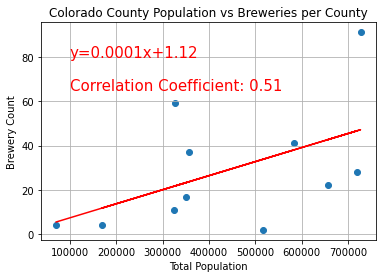

<Figure size 432x288 with 0 Axes>

In [173]:
x= complete_clean_df['Total Population'].astype(float)
y= complete_clean_df['county_province']

plt.scatter(x=x, y=y)
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)

regression=slope*x+intercept
regression_label=(f'y={round(slope,4)}x+{round(intercept,2)}')
plt.plot(x,regression, "r-")
plt.annotate(regression_label, (100000,80), fontsize=15, color="red")
plt.annotate(f'Correlation Coefficient: {round(rvalue,2)}', (100000,65), fontsize=15, color='red')

plt.xlabel('Total Population')
plt.ylabel('Brewery Count')
plt.title('Colorado County Population vs Breweries per County')
plt.grid(True)
plt.show()
plt.savefig('../Output/colorado_county_population_vs_breweries_per_county',bbox_inches="tight",dpi=400)


scatter plot male population vs breweries by county. Add liner regression. Save to Output directory

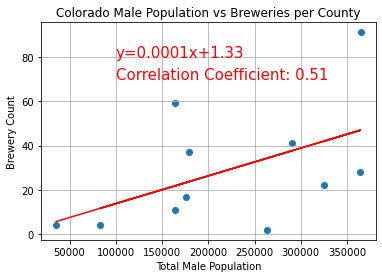

<Figure size 432x288 with 0 Axes>

In [174]:
x= complete_clean_df['Male Population'].astype(float)
y= complete_clean_df['county_province']

plt.scatter(x=x, y=y)

slope, intercept, rvalue, pvalue, stderr = linregress(x, y)

regression=slope*x+intercept
regression_label=(f'y={round(slope,4)}x+{round(intercept,2)}')
plt.plot(x,regression, "r-")
plt.annotate(regression_label, (100000,80), fontsize=15, color="red")
plt.annotate(f'Correlation Coefficient: {round(rvalue,2)}', (100000,70), fontsize=15, color='red')

plt.xlabel('Total Male Population')
plt.ylabel('Brewery Count')
plt.title('Colorado Male Population vs Breweries per County')
plt.grid(True)
plt.show()
plt.savefig('../Output/colorado_male_population_vs_breweries_per_county',bbox_inches="tight",dpi=400)

scatter plot female population vs breweries by county. Add linear regression and save to Output directory

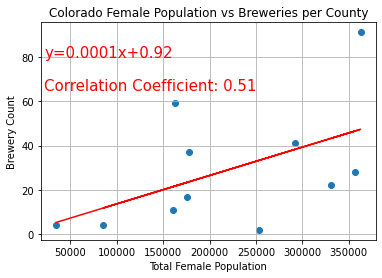

<Figure size 432x288 with 0 Axes>

In [175]:
x= complete_clean_df['Female Population'].astype(float)
y= complete_clean_df['county_province']

plt.scatter(x=x, y=y)

slope, intercept, rvalue, pvalue, stderr = linregress(x, y)

regression=slope*x+intercept
regression_label=(f'y={round(slope,4)}x+{round(intercept,2)}')
plt.plot(x,regression, "r-")
plt.annotate(regression_label, (22000,80), fontsize=15, color="red")
plt.annotate(f'Correlation Coefficient: {round(rvalue,2)}', (22000,65), fontsize=15, color='red')

plt.xlabel('Total Female Population')
plt.ylabel('Brewery Count')
plt.title('Colorado Female Population vs Breweries per County')
plt.grid(True)
plt.show()
plt.savefig('../Output/colorado_female_population_vs_breweries_per_county',bbox_inches="tight",dpi=400)

scatter plot median age vs breweries by county. Add linear regression and save to Output directory

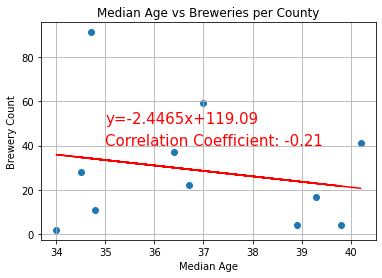

<Figure size 432x288 with 0 Axes>

In [176]:
x= complete_clean_df['Median Age'].astype(float)
y= complete_clean_df['county_province']

plt.scatter(x=x, y=y)

slope, intercept, rvalue, pvalue, stderr = linregress(x, y)

regression=slope*x+intercept
regression_label=(f'y={round(slope,4)}x+{round(intercept,2)}')
plt.plot(x,regression, "r-")
plt.annotate(regression_label, (35,50), fontsize=15, color="red")
plt.annotate(f'Correlation Coefficient: {round(rvalue,2)}', (35,40), fontsize=15, color='red')


plt.xlabel('Median Age')
plt.ylabel('Brewery Count')
plt.title('Median Age vs Breweries per County')
plt.grid(True)
plt.show()
plt.savefig('../Output/median_age_vs_breweries_per_county', bbox_inches="tight",dpi=400) #dpi increases resolution 

Bring the columns down so you don't have to scroll up to get the name of each column.

In [177]:
complete_clean_df.columns

Index(['Total Population', 'Male Population', 'Female Population',
       'Median Age', 'High School Diploma', 'Associates Degree',
       'Bachelor's Degree', 'Doctoral', 'Median Household Income',
       'county_province', 'Breweries per 1000 people'],
      dtype='object')

Scatter plot high school diploma vs breweries by county. Add linear regression and save to Output directory.

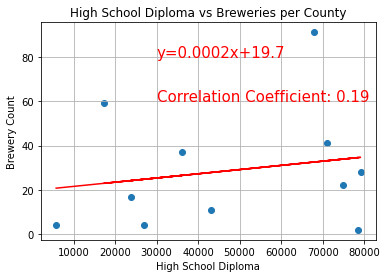

<Figure size 432x288 with 0 Axes>

In [178]:
x= complete_clean_df['High School Diploma'].astype(float)
y= complete_clean_df['county_province']

plt.scatter(x=x, y=y)

slope, intercept, rvalue, pvalue, stderr = linregress(x, y)

regression=slope*x+intercept
regression_label=(f'y={round(slope,4)}x+{round(intercept,2)}')
plt.plot(x,regression, "r-")
plt.annotate(regression_label, (30000,80), fontsize=15, color="red")
plt.annotate(f'Correlation Coefficient: {round(rvalue,2)}', (30000,60), fontsize=15, color='red')

plt.xlabel('High School Diploma')
plt.ylabel('Brewery Count')
plt.title('High School Diploma vs Breweries per County')
plt.grid(True)
plt.show()
plt.savefig('../Output/highschool_diploma_vs_breweries_per_county', bbox_inches="tight",dpi=400)
#plt.savefig('../Pymaceuticals/Tumor vol vs mouse weight for Cap.png') 

Scatter plot associates degree vs breweries by county. Add linear regression and save to Output directory.

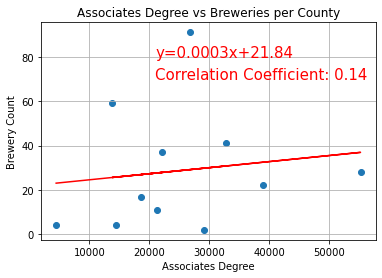

<Figure size 432x288 with 0 Axes>

In [179]:
x= complete_clean_df['Associates Degree'].astype(float)
y= complete_clean_df['county_province']

plt.scatter(x=x, y=y)

slope, intercept, rvalue, pvalue, stderr = linregress(x, y)

regression=slope*x+intercept
regression_label=(f'y={round(slope,4)}x+{round(intercept,2)}')
plt.plot(x,regression, "r-")
plt.annotate(regression_label, (21000,80), fontsize=15, color="red")
plt.annotate(f'Correlation Coefficient: {round(rvalue,2)}', (21000,70), fontsize=15, color='red')

plt.xlabel('Associates Degree')
plt.ylabel('Brewery Count')
plt.title('Associates Degree vs Breweries per County')
plt.grid(True)
plt.show()
plt.savefig('../Output/associates_degree_vs_breweries_per_county', bbox_inches="tight",dpi=400)

Scatter plot bachelor degree vs breweries by county. Add linear regression and save to Output directory.

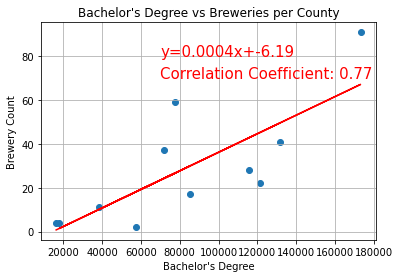

<Figure size 432x288 with 0 Axes>

In [180]:
x= complete_clean_df['Bachelor\'s Degree'].astype(float)
y= complete_clean_df['county_province']

plt.scatter(x=x, y=y)
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)

regression=slope*x+intercept
regression_label=(f'y={round(slope,4)}x+{round(intercept,2)}')
plt.plot(x,regression, "r-")
plt.annotate(regression_label, (70000,80), fontsize=15, color="red")
plt.annotate(f'Correlation Coefficient: {round(rvalue,2)}', (70000,70), fontsize=15, color='red')


plt.xlabel('Bachelor\'s Degree')
plt.ylabel('Brewery Count')
plt.title('Bachelor\'s Degree vs Breweries per County')
plt.grid(True)
plt.show()
plt.savefig('../Output/bachelor_degree_vs_breweries_per_county', bbox_inches="tight",dpi=400)

Scatter plot doctoral vs breweries by county. Add linear regression and save to ouput directory.

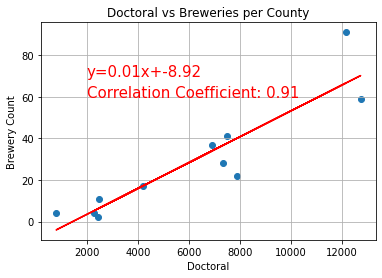

<Figure size 432x288 with 0 Axes>

In [181]:
x= complete_clean_df['Doctoral'].astype(float)
y= complete_clean_df['county_province']

plt.scatter(x=x, y=y)
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)

regression=slope*x+intercept
regression_label=(f'y={round(slope,2)}x+{round(intercept,2)}')
plt.plot(x,regression, "r-")
plt.annotate(regression_label, (2000,70), fontsize=15, color="red")
plt.annotate(f'Correlation Coefficient: {round(rvalue,2)}', (2000,60), fontsize=15, color='red')

plt.xlabel('Doctoral')
plt.ylabel('Brewery Count')
plt.title('Doctoral vs Breweries per County')
plt.grid(True)
plt.show()
plt.savefig('../Output/doctoral_degree_vs_breweries_per_county',bbox_inches="tight",dpi=400)
#13 counties showing a strong relationship.
# Conclusion doctors drink craft beer or they live near craft beer.


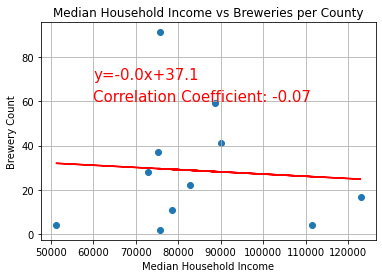

<Figure size 432x288 with 0 Axes>

In [182]:
x= complete_clean_df['Median Household Income'].astype(float)
y= complete_clean_df['county_province']

plt.scatter(x=x, y=y)

slope, intercept, rvalue, pvalue, stderr = linregress(x, y)

regression=slope*x+intercept
regression_label=(f'y={round(slope,2)}x+{round(intercept,2)}')
plt.plot(x,regression, "r-")
plt.annotate(regression_label, (60000,70), fontsize=15, color="red")
plt.annotate(f'Correlation Coefficient: {round(rvalue,2)}', (60000,60), fontsize=15, color='red')


plt.xlabel('Median Household Income')
plt.ylabel('Brewery Count')
plt.title('Median Household Income vs Breweries per County')
plt.grid(True)
plt.show()
plt.savefig('../Output/median_household_income_vs_breweries_per_county',bbox_inches="tight",dpi=400)

Scatter plot doctoral vs median household income. Add linear regression and save to Output directory.

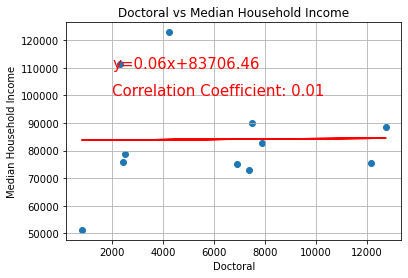

<Figure size 432x288 with 0 Axes>

In [183]:
x= complete_clean_df['Doctoral'].astype(float)
y= complete_clean_df['Median Household Income'].astype(float)

plt.scatter(x=x, y=y)

slope, intercept, rvalue, pvalue, stderr = linregress(x, y)

regression=slope*x+intercept
regression_label=(f'y={round(slope,2)}x+{round(intercept,2)}')
plt.plot(x,regression, "r-")
plt.annotate(regression_label, (2000,110000), fontsize=15, color="red")
plt.annotate(f'Correlation Coefficient: {round(rvalue,2)}', (2000,100000), fontsize=15, color='red')

plt.xlabel('Doctoral')
plt.ylabel('Median Household Income')
plt.title('Doctoral vs Median Household Income')
plt.grid(True)
plt.show()
plt.savefig('../Output/doctoral_vs_median_household_income',bbox_inches="tight",dpi=400)
# not a huge relationship between a doctorate and median household income